Title: Regression Models

Polynomial Regression

Task 1: Apply polynomial regression to a dataset showing the relationship between age and income.

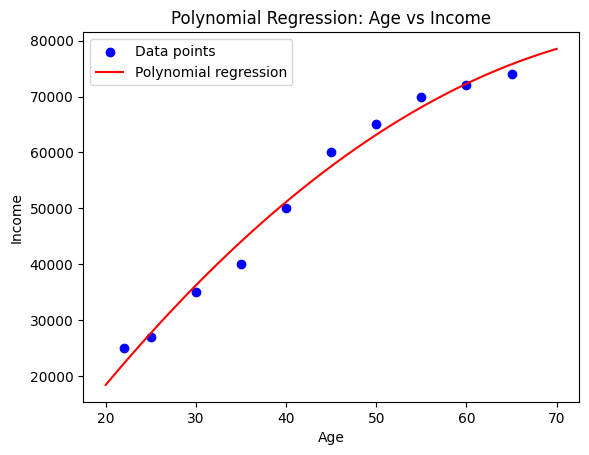

In [4]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data: Age vs Income
age = np.array([22, 25, 30, 35, 40, 45, 50, 55, 60, 65]).reshape(-1, 1)
income = np.array([25000, 27000, 35000, 40000, 50000, 60000, 65000, 70000, 72000, 74000])

# Transform input features to polynomial features degree=2 (quadratic)
poly = PolynomialFeatures(degree=2)
age_poly = poly.fit_transform(age)

# Fit linear regression model on polynomial features
model = LinearRegression()
model.fit(age_poly, income)

# Predict income for age range for smooth curve plotting
age_range = np.linspace(20, 70, 100).reshape(-1, 1)
age_range_poly = poly.transform(age_range)
income_pred = model.predict(age_range_poly)

# Plot original data and polynomial regression curve
plt.scatter(age, income, color='blue', label='Data points')
plt.plot(age_range, income_pred, color='red', label='Polynomial regression')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Polynomial Regression: Age vs Income')
plt.legend()
plt.show()


Task 2: Explore and visualize a higher-degree polynomial fitting compared to a simple linear regression.

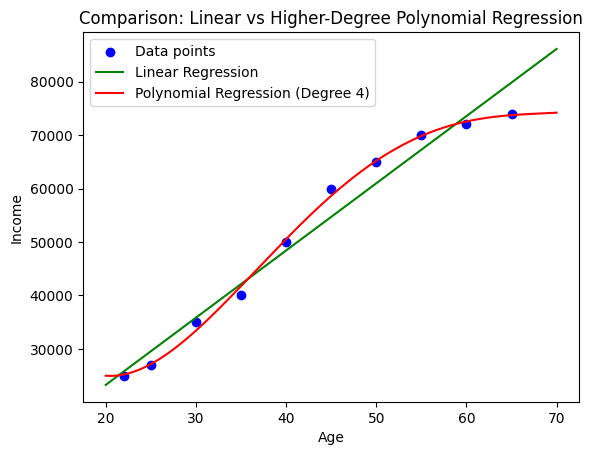

In [5]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data: Age vs Income
age = np.array([22, 25, 30, 35, 40, 45, 50, 55, 60, 65]).reshape(-1, 1)
income = np.array([25000, 27000, 35000, 40000, 50000, 60000, 65000, 70000, 72000, 74000])

# Simple Linear Regression
linear_model = LinearRegression()
linear_model.fit(age, income)
income_pred_linear = linear_model.predict(age)

# Polynomial Regression Degree 4
poly = PolynomialFeatures(degree=4)
age_poly = poly.fit_transform(age)
poly_model = LinearRegression()
poly_model.fit(age_poly, income)

# Predict for a smooth curve over a range
age_range = np.linspace(20, 70, 200).reshape(-1, 1)
income_pred_poly = poly_model.predict(poly.transform(age_range))
income_pred_linear_range = linear_model.predict(age_range)

# Plotting
plt.scatter(age, income, color='blue', label='Data points')
plt.plot(age_range, income_pred_linear_range, color='green', label='Linear Regression')
plt.plot(age_range, income_pred_poly, color='red', label='Polynomial Regression (Degree 4)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Comparison: Linear vs Higher-Degree Polynomial Regression')
plt.legend()
plt.show()



Task 3: Dataset with cyclical patterns such as tides or circadian cycles.

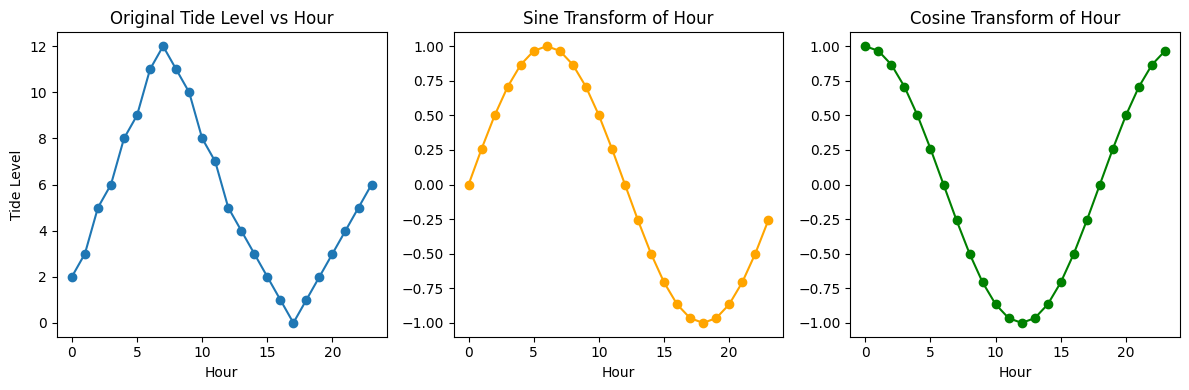

In [6]:
# Write your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset: Hour of day (0-23) and some cyclical measurement (e.g., tide level)
data = pd.DataFrame({
    'hour': np.arange(0, 24),
    'tide_level': [2, 3, 5, 6, 8, 9, 11, 12, 11, 10, 8, 7, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6]
})

# Convert hour to cyclical features
data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)

# Plot original and transformed features
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(data['hour'], data['tide_level'], marker='o')
plt.title('Original Tide Level vs Hour')
plt.xlabel('Hour')
plt.ylabel('Tide Level')

plt.subplot(1,3,2)
plt.plot(data['hour'], data['hour_sin'], marker='o', color='orange')
plt.title('Sine Transform of Hour')
plt.xlabel('Hour')

plt.subplot(1,3,3)
plt.plot(data['hour'], data['hour_cos'], marker='o', color='green')
plt.title('Cosine Transform of Hour')
plt.xlabel('Hour')

plt.tight_layout()
plt.show()
